**Integrantes:**

Nome: Danilo Costa Bento RA: 823119129 - USJT Mooca

Nome: Heloysa Fernanda dos Santos RA: 824141057 - USJT Mooca

Nome: Leonardo Alceu Rodrigues Gouveia RA: 822125240 - USJT Paulista

**DataSet Escolhido: Análise dos Filmes Exibidos 2009 a 2019:**

## Link: https://www.kaggle.com/datasets/pedrothiago/anlise-dos-filmes-exibidos-2009-a-2019/code

In [29]:
#Bibliotecas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [30]:
# Importando CSV

df = pd.read_csv('/content/Listagem_dos_Filmes_Brasileiros_e_Estrangeiros_Exibidos_2009_a_2019.csv', index_col=0)
df

,Ano de exibição,Título da obra,Gênero,País(es) produtor(es) da obra,Nacionalidade da obra,Empresa distribuidora,Origem da empresa distribuidora,Público no ano de exibição,Renda (R$) no ano de exibição
0,2019,120 Batimentos Por Minuto,Ficção,França,Estrangeira,Imovision,Distribuição Nacional,10.0,70.00
1,2019,3 Faces,Ficção,Irã,Estrangeira,Imovision,Distribuição Nacional,6289.0,103805.00
2,2019,45 Dias Sem Você,Ficção,Brasil,Brasileira,O2 Play,Distribuição Nacional,3303.0,31295.00
3,2019,A 100 Passos De Um Sonho,Ficção,Estados Unidos,Estrangeira,Disney,Distribuição Internacional,69.0,4186.00
4,2019,A Abelhinha Maya - O Filme,Animação,Alemanha,Estrangeira,Playarte,Distribuição Nacional,402.0,3531.00
...,...,...,...,...,...,...,...,...,...
7076,2009,Xuxa Gêmeas,Ficção,Brasil,Brasileira,Fox,Distribuição Internacional,1671.0,5013.00
7077,2009,Zico na Rede,Documentário,Brasil,Brasileira,Business Telecom,Distribuição Nacional,546.0,2529.50
7078,2009,À Deriva,Ficção,"Brasil, Estados Unidos",Brasileira,Universal,Distribuição Internacional,94588.0,870171.00
7079,2009,É Proibido Fumar,Ficção,Brasil,Brasileira,Playarte,Distribuição Nacional,33291.0,303276.38


In [31]:
# Quantidade de Filmes por Ano

df['Ano de exibição'].value_counts().sort_index()

Ano de exibição
2009    584
2010    509
2011    558
2012    510
2013    568
2014    675
2015    794
2016    767
2017    703
2018    707
2019    677
Name: count, dtype: int64

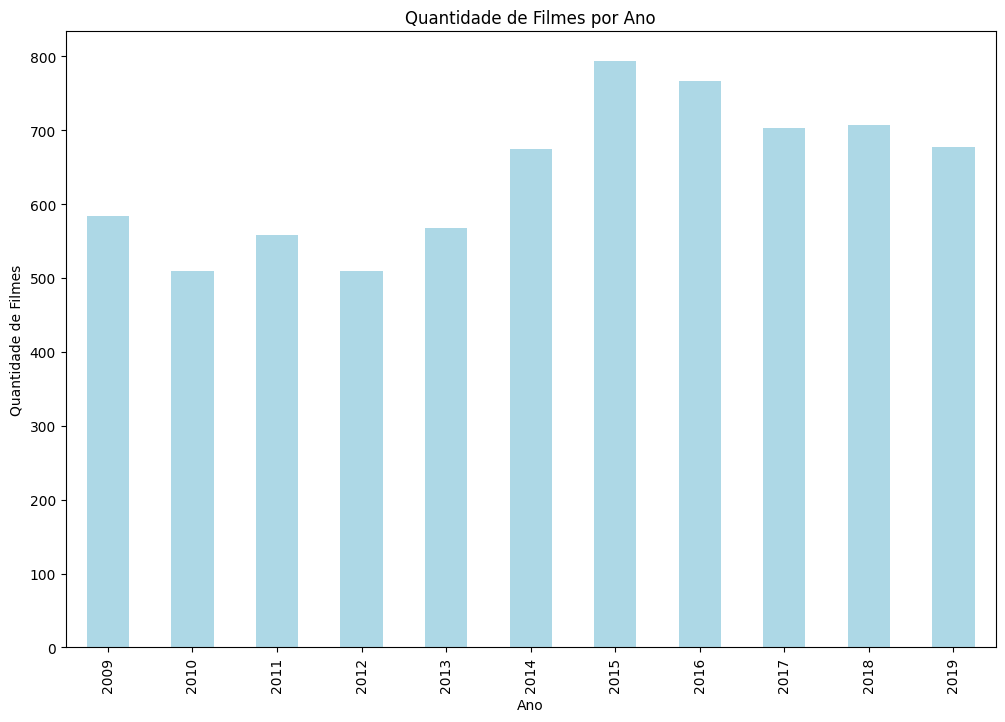

In [32]:
# Representação Gráfica: Quantidade de Filmes por Ano

plt.figure(figsize=(12, 8))

df['Ano de exibição'].value_counts().sort_index().plot(kind='bar', color='lightblue')

plt.title('Quantidade de Filmes por Ano')
plt.xlabel('Ano')
plt.ylabel('Quantidade de Filmes')
plt.show()


In [33]:
# Quantidade de Filmes por Gêneros

df['Gênero'].value_counts()

Gênero
Ficção          5534
Documentário     967
Animação         510
Videomusical      41
Name: count, dtype: int64

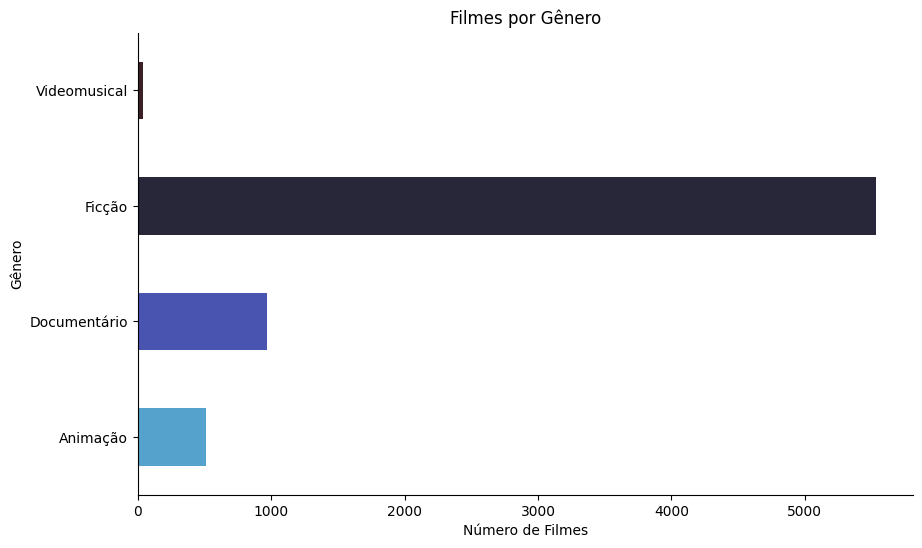

In [34]:
# Representação Gráfica: Quantidade de Filmes por Gênero

df.groupby('Gênero').size().plot(kind='barh', color=sns.color_palette('icefire'), figsize=(10, 6))

plt.gca().spines[['top', 'right',]].set_visible(False)
plt.title('Filmes por Gênero')
plt.ylabel('Gênero')
plt.xlabel('Número de Filmes')
plt.show()

In [35]:
# Gênero por Nacionalidade das Obras

df.groupby(['Gênero', 'Nacionalidade da obra'])['Gênero'].count()


Gênero        Nacionalidade da obra
Animação      Brasileira                 52
              Estrangeira               458
Documentário  Brasileira                751
              Estrangeira               216
Ficção        Brasileira               1302
              Estrangeira              4232
Videomusical  Brasileira                  1
              Estrangeira                40
Name: Gênero, dtype: int64

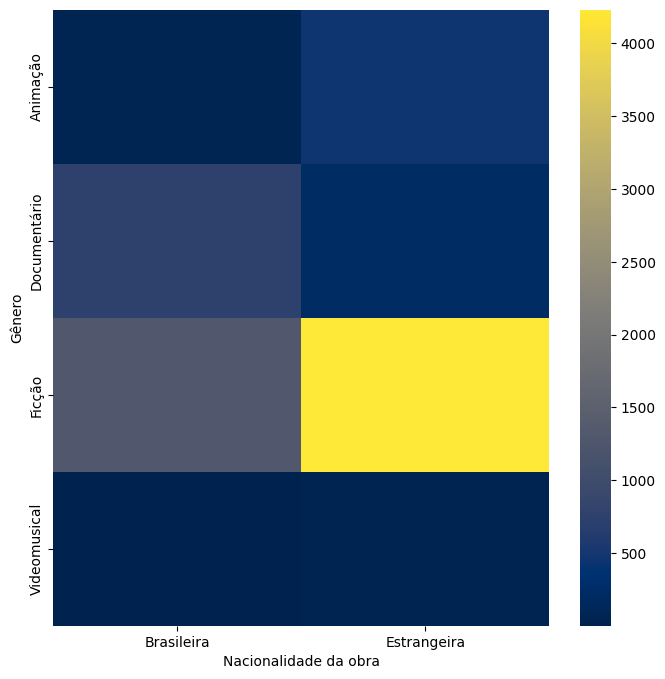

In [36]:
# Representação Gráfica: Gênero por Nacionalidade das Obras

df_2dhist = df.groupby(['Gênero', 'Nacionalidade da obra']).size().unstack()

plt.figure(figsize=(8, 8))
sns.heatmap(df_2dhist, cmap='cividis')
plt.xlabel('Nacionalidade da obra')
plt.ylabel('Gênero')
plt.show()

In [ ]:
# Quantidade de Filmes por Nacionalidade

df['Nacionalidade da obra'].value_counts()


Nacionalidade da obra
Estrangeira    4946
Brasileira     2106
Name: count, dtype: int64

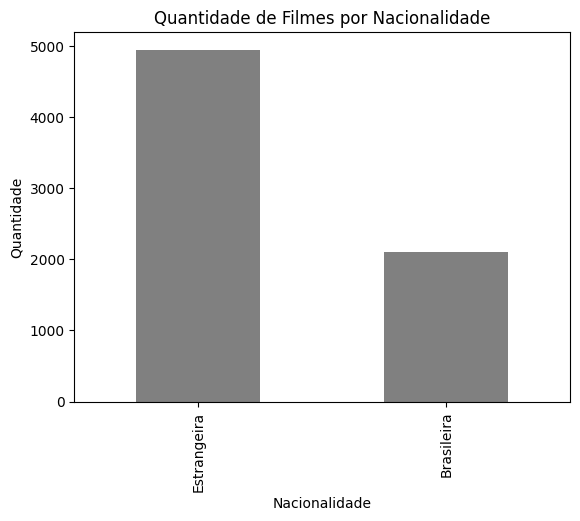

In [23]:
# Representação Gráfica: Quantidade de Filmes por Nacionalidade

df['Nacionalidade da obra'].value_counts().plot(kind='bar', color='grey')
plt.title('Quantidade de Filmes por Nacionalidade')
plt.xlabel('Nacionalidade')
plt.ylabel('Quantidade')
plt.show()

In [ ]:
# Público por Ano de Exibição

df.groupby('Ano de exibição')['Público no ano de exibição'].sum()


Ano de exibição
2009    112670935.0
2010    134836791.0
2011    143206574.0
2012    146598376.0
2013    149518269.0
2014    155612992.0
2015    173022827.0
2016    184327360.0
2017    181226407.0
2018    161838945.0
2019    176433168.0
Name: Público no ano de exibição, dtype: float64

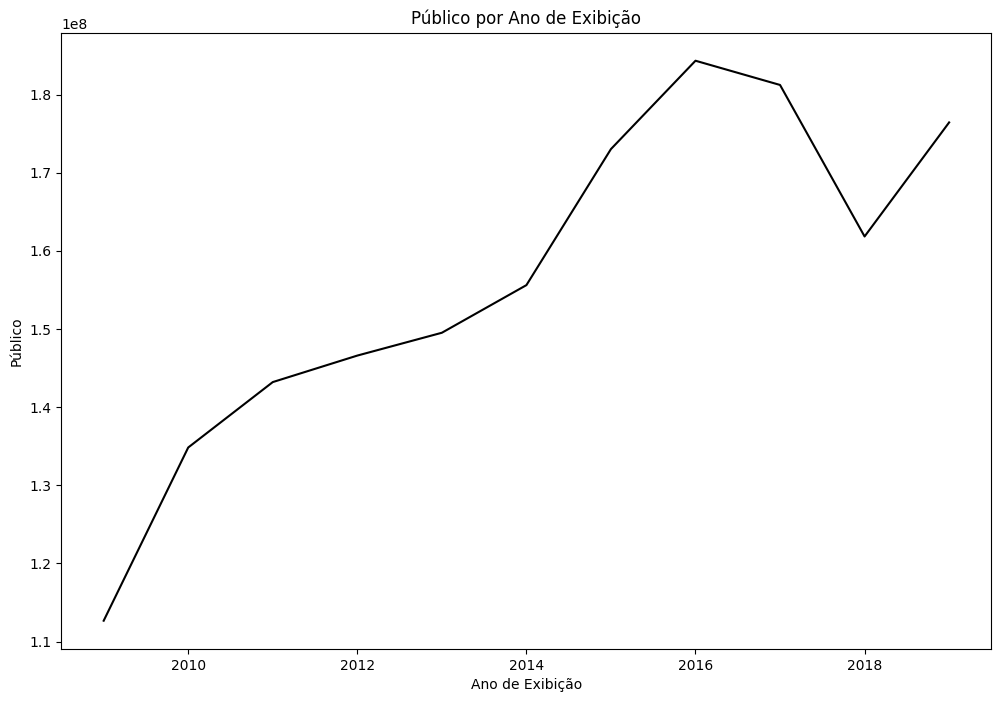

In [ ]:
# Representação Gráfica: Público por Ano de Exibição

plt.figure(figsize=(12, 8))

df.groupby('Ano de exibição')['Público no ano de exibição'].sum().plot(kind='line', color='black')

plt.title('Público por Ano de Exibição')
plt.xlabel('Ano de Exibição')
plt.ylabel('Público')
plt.show()


In [ ]:
# Média de Público por Ano de Exibição

df.groupby('Ano de exibição')['Público no ano de exibição'].mean()


Ano de exibição
2009    192929.683219
2010    264905.286837
2011    256642.605735
2012    287447.796078
2013    263236.389085
2014    230537.765926
2015    217912.880353
2016    240322.503259
2017    257790.052632
2018    228909.398868
2019    260610.292467
Name: Público no ano de exibição, dtype: float64

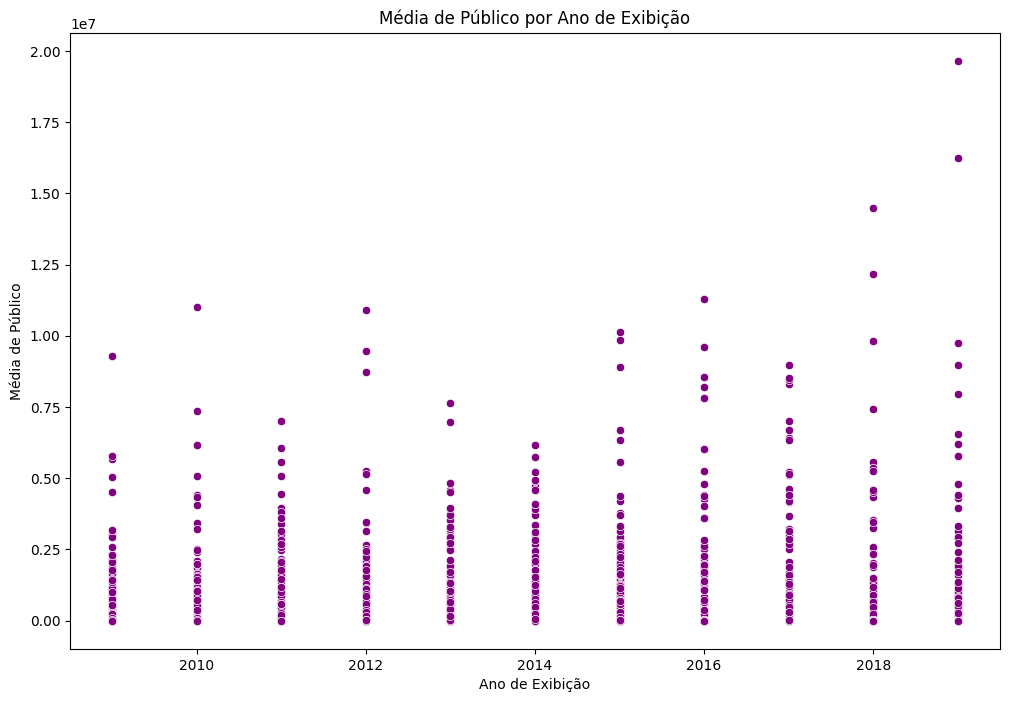

In [13]:
# Representação Gráfica: Média de Público por Ano de Exibição

plt.figure(figsize=(12, 8))

sns.scatterplot(data=df, x="Ano de exibição", y="Público no ano de exibição", color="purple")

plt.title("Média de Público por Ano de Exibição")
plt.xlabel("Ano de Exibição")
plt.ylabel("Média de Público")
plt.show()


In [40]:
# Criar o gráfico do orçamento de cada filme
fig1 = px.pie(df, names='Gênero', values='Renda (R$) no ano de exibição', title='Distribuição da Renda dos Filmes por Gênero')
fig2 = px.pie(df, names='Nacionalidade da obra', values='Renda (R$) no ano de exibição', title='Distribuição do Orçamento dos Filmes por Nacionalidade da Obra')


# Exibir o gráfico
fig1.show()
fig2.show()

# Colocar os valores em ordem crescente
df_sorted = df.groupby('Ano de exibição').apply(lambda x: x.sort_values('Renda (R$) no ano de exibição'))

# Criando o gráfico
fig3 = px.bar(df_sorted, x='Ano de exibição', y='Renda (R$) no ano de exibição',
             title='Orçamento de Filmes por Ano de Exibição (2009-2019)',
             labels={'Orçamento': 'Orçamento (R$)'})

fig3.show()